MA0218 Exercise 5
=================

**Author:** Hankertrix




# Table of Contents







## Solutions



### Problem 1



Import the required libraries.



In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Set the default seaborn style for graphics
sb.set_theme()

Importing the data.



In [2]:
house_data = pd.read_csv("train.csv")
print(house_data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

#### (a)



Get the `CentralAir` data.



In [3]:
central_air_data = house_data["CentralAir"]
print(central_air_data)

0       Y
1       Y
2       Y
3       Y
4       Y
       ..
1455    Y
1456    Y
1457    Y
1458    Y
1459    Y
Name: CentralAir, Length: 1460, dtype: object


Plot the distribution of `CentralAir` with a count plot.



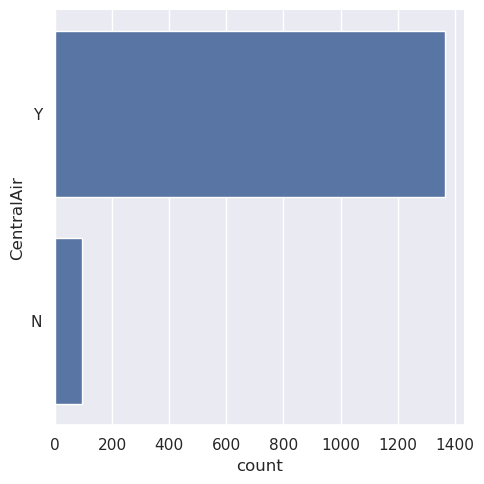

In [4]:
sb.catplot(data=central_air_data, kind="count")

Get the ratio of Y to N.



In [5]:
value_counts = central_air_data.value_counts()
yes_count = value_counts["Y"]
no_count = value_counts["N"]
print(f"{yes_count} : {no_count}")

1365 : 95


#### (b)



Get the sale price data:



In [6]:
sale_price_data = house_data["SalePrice"]
print(sale_price_data.head())

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


Plot `CentralAir` against `SalePrice`.



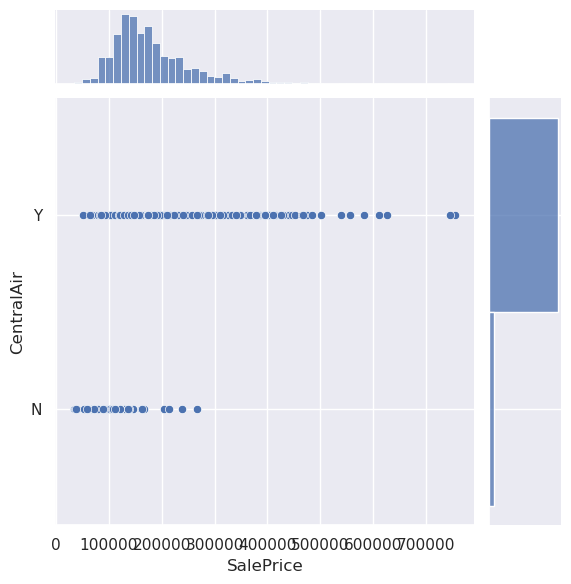

In [7]:
sb.jointplot(y="CentralAir", x="SalePrice", data=house_data)

#### (c)



Import the classification tree model from Scikit-learn.



In [8]:
from sklearn.tree import DecisionTreeClassifier

#### (d)



Import the function to split the data randomly from Scikit-learn.



In [9]:
from sklearn.model_selection import train_test_split

Partition the data into two "random" portions, with the training data of 1100 rows, and a test data of 360 rows.



In [10]:
training_data, test_data = train_test_split(house_data[:1100 + 360], test_size = (360 / (1100 + 360)))
print(len(training_data))
print(len(test_data))

1100
360


#### (e)



Create the decision tree classifier object.



In [11]:
decision_tree = DecisionTreeClassifier(max_depth=2)

Get the training and test data for the `CentralAir` and `SalePrice` variables.



In [12]:
sale_price_training_data = pd.DataFrame(training_data["SalePrice"])
sale_price_test_data = pd.DataFrame(test_data["SalePrice"])
central_air_training_data = pd.DataFrame(training_data["CentralAir"])
central_air_test_data = pd.DataFrame(test_data["CentralAir"])

Fit a decision tree model, with `SalePrice` as the predictor and the `CentralAir` as the response.



In [13]:
decision_tree.fit(sale_price_training_data, central_air_training_data)

DecisionTreeClassifier(max_depth=2)

#### (f)



Import the plot tree function.



In [14]:
from sklearn.tree import plot_tree

Visualise the fitted decision tree model.



[Text(0.5, 0.8333333333333334, 'SalePrice <= 107700.0\ngini = 0.122\nsamples = 1100\nvalue = [72, 1028]'),
 Text(0.25, 0.5, 'SalePrice <= 59250.0\ngini = 0.467\nsamples = 116\nvalue = [43, 73]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.436\nsamples = 106\nvalue = [34, 72]'),
 Text(0.75, 0.5, 'SalePrice <= 145125.0\ngini = 0.057\nsamples = 984\nvalue = [29, 955]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.141\nsamples = 315\nvalue = [24.0, 291.0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.015\nsamples = 669\nvalue = [5, 664]')]

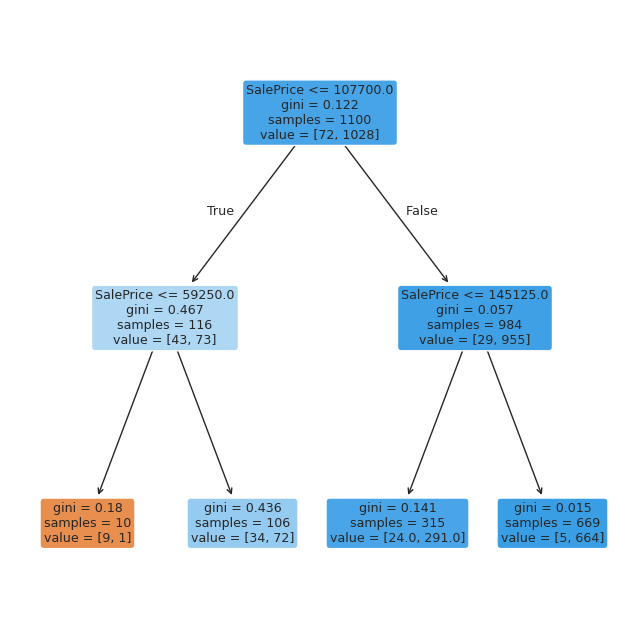

In [15]:
figure = plt.figure(figsize=(8, 8))
plot_tree(decision_tree, filled=True, rounded=True, feature_names=["SalePrice"])

#### (g)



Predict `CentralAir` using the sale price training data set.



In [16]:
central_air_training_prediction = decision_tree.predict(sale_price_training_data)

Import the function to plot the confusion matrix.



In [17]:
from sklearn.metrics import confusion_matrix

Plot the 2-way confusion matrix.



<Axes: >

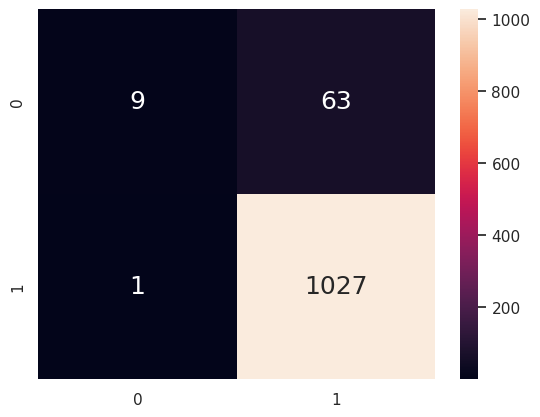

In [18]:
# Get the resulting confusion matrix of the data
confusion_matrix_training_result = confusion_matrix(
    central_air_training_data,
    central_air_training_prediction,
)

# Plot the 2 way confusion matrix
sb.heatmap(
    confusion_matrix_training_result,
    annot=True,
    fmt=".0f",
    annot_kws={"size": 18},
)

#### (e)



Get the all the data needed to calculate the true positive rate, true negative rate, false positive rate, and false negative rate.



In [19]:
true_negative_amount, false_positive_amount, false_negative_amount, true_positive_amount = confusion_matrix_training_result.ravel()
print(true_negative_amount, false_positive_amount, false_negative_amount, true_positive_amount)

9 63 1 1027


Calculate the true positive rate, true negative rate, false positive rate, and false negative rate.



In [20]:
true_positive_rate = float(true_positive_amount / (true_positive_amount + false_negative_amount))
true_negative_rate = float(true_negative_amount / (true_negative_amount + false_positive_amount))
false_positive_rate = float(false_positive_amount / (false_positive_amount + true_negative_amount))
false_negative_rate = float(false_negative_amount / (true_positive_amount + false_negative_amount))

Print out all the accuracy measures.



In [21]:
print(f"Classification accuracy:", decision_tree.score(sale_price_training_data, central_air_training_data))
print(f"{true_positive_rate= }".replace("=", ":"))
print(f"{true_negative_rate= }".replace("=", ":"))
print(f"{false_positive_rate= }".replace("=", ":"))
print(f"{false_negative_rate= }".replace("=", ":"))

Classification accuracy: 0.9418181818181818
true_positive_rate: 0.9990272373540856
true_negative_rate: 0.125
false_positive_rate: 0.875
false_negative_rate: 0.0009727626459143969


#### (f)



Predict `CentralAir` using the sale price test data set.



In [22]:
central_air_test_prediction = decision_tree.predict(sale_price_test_data)

Get the confusion matrix.



In [23]:
confusion_matrix_test_result = confusion_matrix(central_air_test_data, central_air_test_prediction)

Plot the 2-way confusion matrix.



<Axes: >

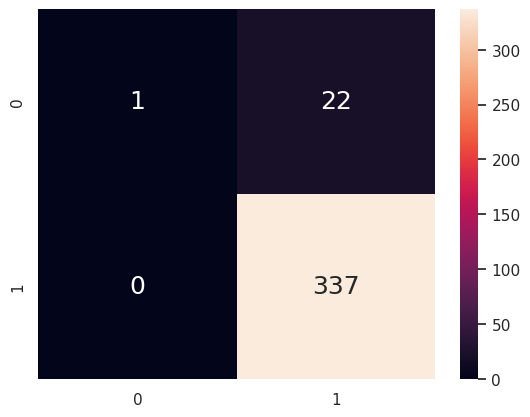

In [24]:
sb.heatmap(
    confusion_matrix_test_result,
    annot=True,
    fmt=".0f",
    annot_kws={"size": 18},
)

#### (j)



Get the all the data needed to calculate the true positive rate, true negative rate, false positive rate, and false negative rate.



In [25]:
true_negative_amount, false_positive_amount, false_negative_amount, true_positive_amount = confusion_matrix_test_result.ravel()
print(true_negative_amount, false_positive_amount, false_negative_amount, true_positive_amount)

1 22 0 337


Calculate the true positive rate, true negative rate, false positive rate, and false negative rate.



In [26]:
true_positive_rate = float(true_positive_amount / (true_positive_amount + false_negative_amount))
true_negative_rate = float(true_negative_amount / (true_negative_amount + false_positive_amount))
false_positive_rate = float(false_positive_amount / (false_positive_amount + true_negative_amount))
false_negative_rate = float(false_negative_amount / (true_positive_amount + false_negative_amount))

Print out all the accuracy measures.



In [27]:
print(f"Classification accuracy:", decision_tree.score(sale_price_training_data, central_air_training_data))
print(f"{true_positive_rate= }".replace("=", ":"))
print(f"{true_negative_rate= }".replace("=", ":"))
print(f"{false_positive_rate= }".replace("=", ":"))
print(f"{false_negative_rate= }".replace("=", ":"))

Classification accuracy: 0.9418181818181818
true_positive_rate: 1.0
true_negative_rate: 0.043478260869565216
false_positive_rate: 0.9565217391304348
false_negative_rate: 0.0


### Problem 2



Create the function to plot the heatmap.



In [28]:
def heatmap_plot(confusion_matrix: np.ndarray) -> None:
    """Function to plot a heatmap with seaborn"""
    figure = plt.figure(figsize=(6, 6))
    sb.heatmap(
        confusion_matrix,
        annot=True,
        fmt=".0f",
        annot_kws={"size": 18},
    )

Create a function to calculate and print the accuracy measures.



In [29]:
def print_accuracy_measures(
    variable_name: str,
    confusion_matrix: np.ndarray,
    classification_accuracy: float,
    *,
    is_test: bool,
) -> None:
    """
    Function to print out the accuracy measures,
    which are:
    - Classification accuracy
    - True positive rate
    - True negative rate
    - False positive rate
    - False negative rate
    """

    # Get all the data needed to calculate the accuracy measures
    (
        true_negative_amount,
        false_positive_amount,
        false_negative_amount,
        true_positive_amount,
    ) = confusion_matrix.ravel()

    # Calculate the true positive rate
    true_positive_rate = float(true_positive_amount / (true_positive_amount + false_negative_amount))

    # Calculate the true negative rate
    true_negative_rate = float(true_negative_amount / (true_negative_amount + false_positive_amount))

    # Calculate the false positive rate
    false_positive_rate = float(false_positive_amount / (false_positive_amount + true_negative_amount))

    # Calculate the false negative rate
    false_negative_rate = float(false_negative_amount / (true_positive_amount + false_negative_amount))

    # Get the string for the data set
    dataset_type = "testing" if is_test else "training"

    # Print out all the variables
    print(f"Accuracy measures for {variable_name} {dataset_type} data:\n")
    print(f"{classification_accuracy= }".replace("=", ":"))
    print(f"{true_positive_rate= }".replace("=", ":"))
    print(f"{true_negative_rate= }".replace("=", ":"))
    print(f"{false_positive_rate= }".replace("=", ":"))
    print(f"{false_negative_rate= }".replace("=", ":"))
    print("\n")

Make a function to do all of the above steps.



In [30]:
def data_science_pipeline(
    data: pd.DataFrame,
    dependent_variable: str,
    independent_variables: list[str],
) -> None:
    """
    Function to execute the data science pipeline
    to perform binary classification on all of the
    dependent variables.
    """

    # Iterate over all of the independent variables
    for variable in independent_variables:

        # Plot the joint plot of the dependent variable
        # against the independent variable
        sb.jointplot(y=dependent_variable, x=variable, data=data)

        # Partition the data into two "random" portions,
        # with the training data of 1100 rows, and a test data
        # of 360 rows.
        training_data, test_data = train_test_split(
            data[:1100 + 360],
            test_size=(360 / (1100 + 360))
        )

        # Create the decision tree classifier object
        decision_tree = DecisionTreeClassifier(max_depth=2)

        # Get the training data for the variables
        independent_variable_training_data = pd.DataFrame(
            training_data[variable]
        )
        dependent_variable_training_data = pd.DataFrame(
            training_data[dependent_variable]
        )

        # Get the test data for the variables
        independent_variable_test_data = pd.DataFrame(
            test_data[variable]
        )
        dependent_variable_test_data = pd.DataFrame(
            test_data[dependent_variable]
        )

        # Fit the decision tree model, with the independent
        # variable as the predictor and the dependent variable
        # as the response.
        decision_tree.fit(
            independent_variable_training_data,
            dependent_variable_training_data,
        )

        # Visualise the fitted decision tree model
        figure = plt.figure(figsize=(8, 8))
        plot_tree(
            decision_tree,
            filled=True,
            rounded=True,
            feature_names=[variable]
        )

        # Predict the dependent variable using the
        # independent variable training data set
        training_prediction = decision_tree.predict(
            independent_variable_training_data
        )

        # Get the training confusion matrix
        training_confusion_matrix = confusion_matrix(
            dependent_variable_training_data,
            training_prediction
        )

        # Plot the 2 way confusion matrix for the training prediction
        heatmap_plot(training_confusion_matrix)

        # Get the training classification accuracy
        training_classification_accuracy = decision_tree.score(
            independent_variable_training_data,
            dependent_variable_training_data,
        )

        # Print out all the accuracy measures for the training data set
        print_accuracy_measures(
            variable,
            training_confusion_matrix,
            training_classification_accuracy,
            is_test=False,
        )

        # Predict the dependent variable using the test data set
        test_prediction = decision_tree.predict(
            independent_variable_test_data
        )

        # Get the test confusion matrix
        test_confusion_matrix = confusion_matrix(
            dependent_variable_test_data,
            test_prediction,
        )

        # Plot the 2 way confusion matrix for the test prediction
        heatmap_plot(test_confusion_matrix)

        # Get the test classification accuracy
        test_classification_accuracy = decision_tree.score(
            independent_variable_test_data,
            dependent_variable_test_data,
        )

        # Print out all the accuracy measures for the testing data set
        print_accuracy_measures(
            variable,
            test_confusion_matrix,
            test_classification_accuracy,
            is_test=True
        )

Initialise the variables to run the pipeline on.



In [31]:
variables = ["GrLivArea", "OverallQual", "YearBuilt"]

Call the function to run the pipeline on the variables defined above.



Accuracy measures for GrLivArea training data:

classification_accuracy: 0.9390909090909091
true_positive_rate: 1.0
true_negative_rate: 0.028985507246376812
false_positive_rate: 0.9710144927536232
false_negative_rate: 0.0


Accuracy measures for GrLivArea testing data:

classification_accuracy: 0.9333333333333333
true_positive_rate: 1.0
true_negative_rate: 0.07692307692307693
false_positive_rate: 0.9230769230769231
false_negative_rate: 0.0


Accuracy measures for OverallQual training data:

classification_accuracy: 0.9427272727272727
true_positive_rate: 0.9941747572815534
true_negative_rate: 0.18571428571428572
false_positive_rate: 0.8142857142857143
false_negative_rate: 0.005825242718446602


Accuracy measures for OverallQual testing data:

classification_accuracy: 0.9305555555555556
true_positive_rate: 0.991044776119403
true_negative_rate: 0.12
false_positive_rate: 0.88
false_negative_rate: 0.008955223880597015


Accuracy measures for YearBuilt training data:

classification_accuracy

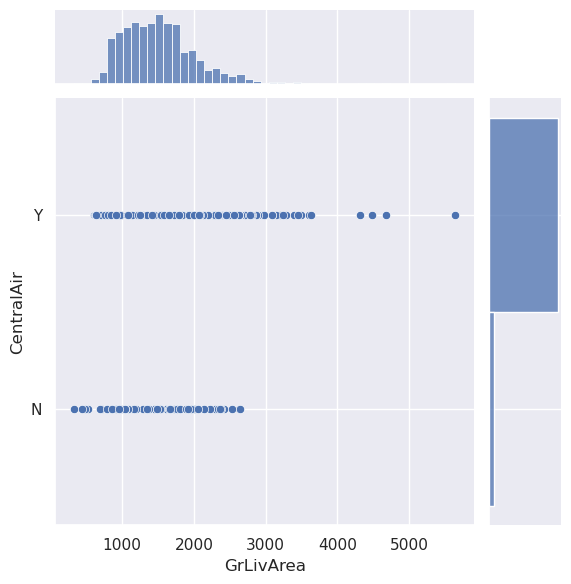

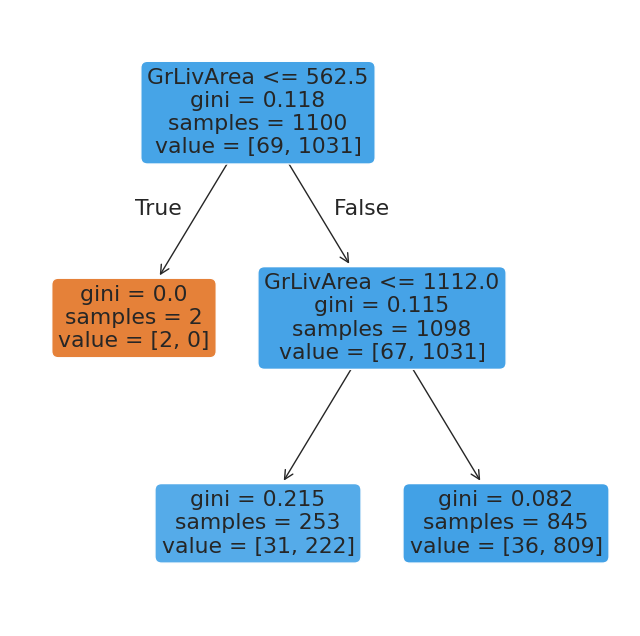

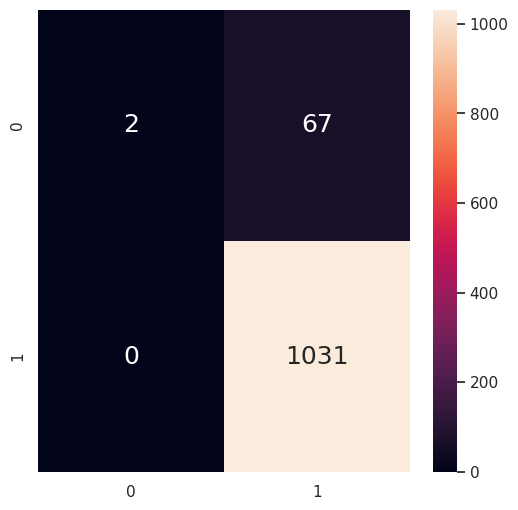

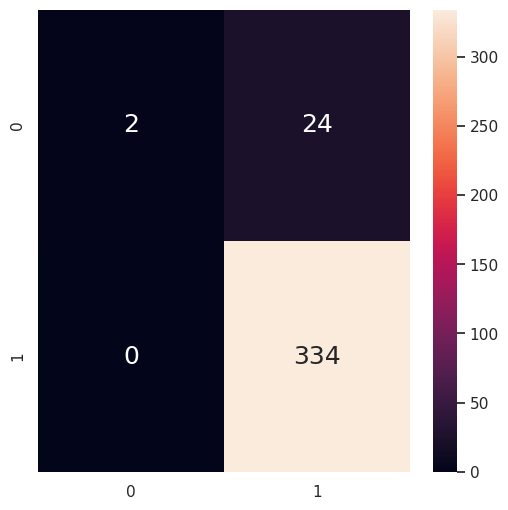

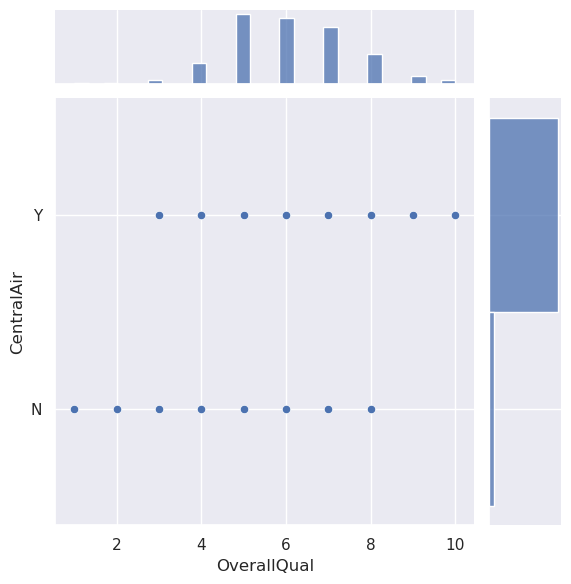

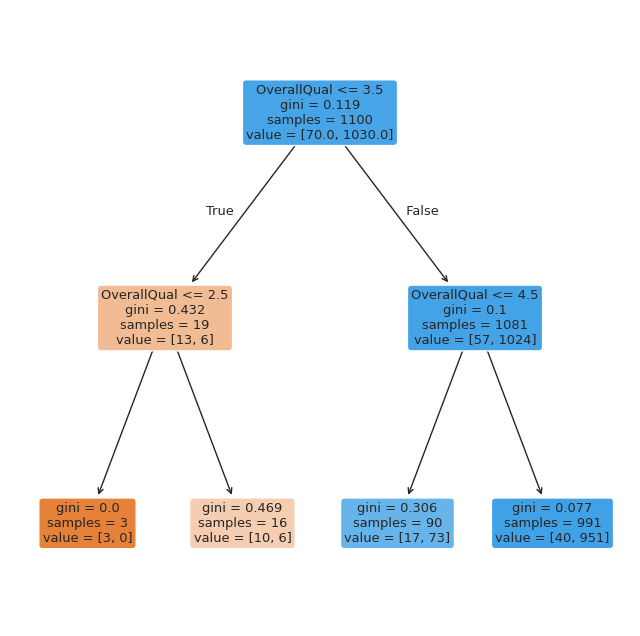

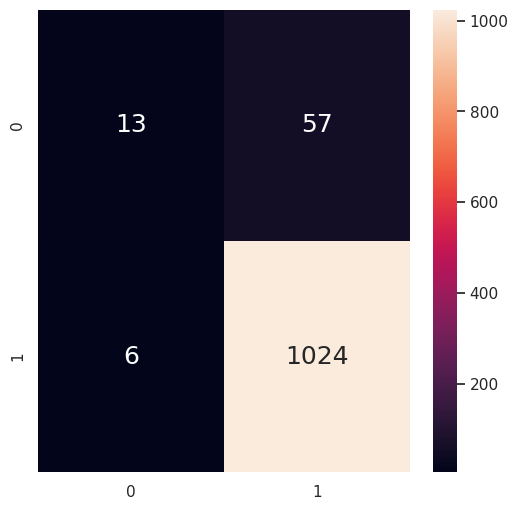

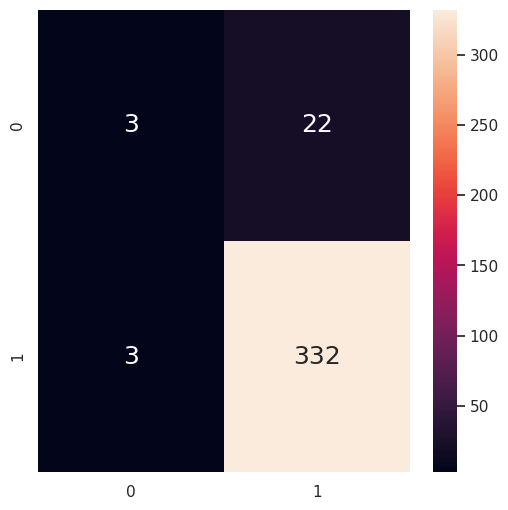

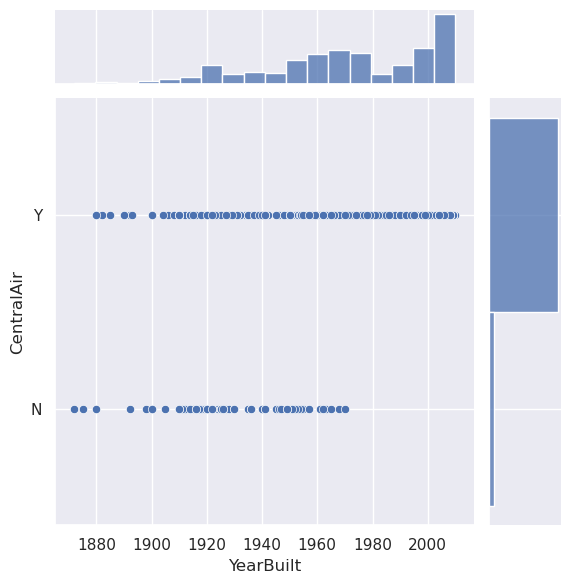

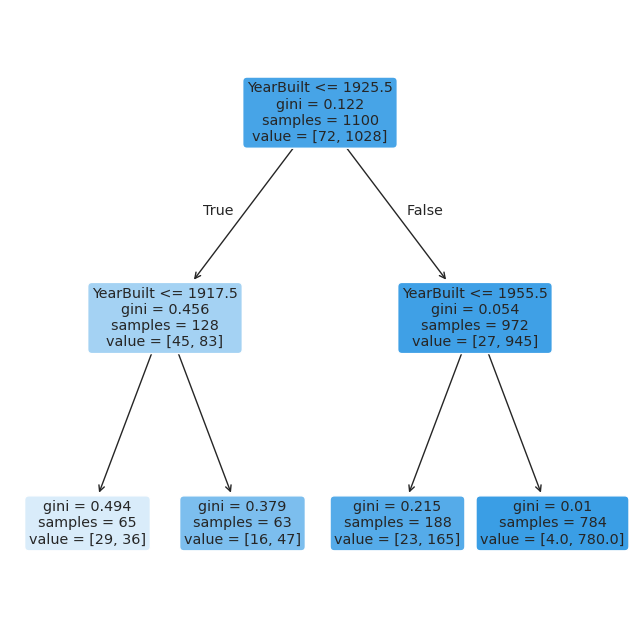

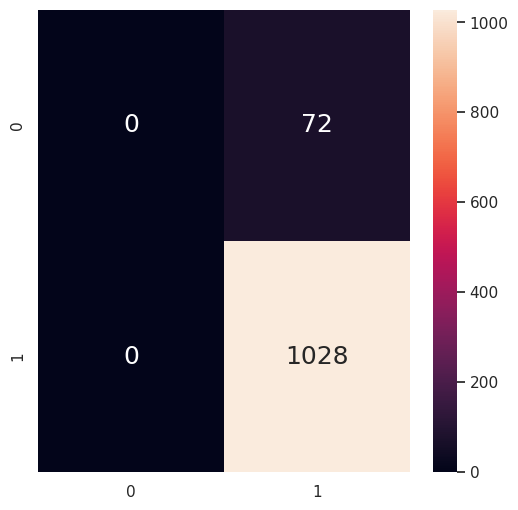

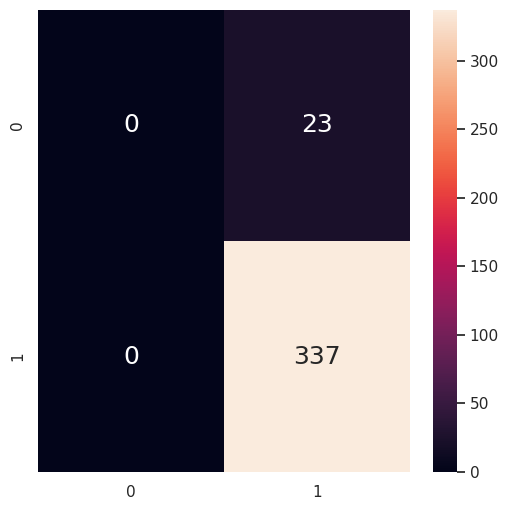

In [32]:
data_science_pipeline(house_data, "CentralAir", variables)

### Problem 3



The classification accuracy of `OverallQual` is the greatest amongst all other variables, as well as having a much higher true negative rate. Hence, I think that the `OverallQual` classification tree is the best to predict `CentralAir`. However, due to the random nature of the training and testing data set, these accuracy metrics are only valid for the results above, and not when the classifier is run again.

